In [12]:
import sys, subprocess
print('Notebook sys.executable:', sys.executable)
print('Notebook sys.version:', sys.version)
try:
    import torch
    print('torch import OK — version:', torch.__version__)
except Exception as e:
    print('torch import failed:', type(e).__name__, e)
subprocess.run([sys.executable, '-m', 'pip', 'show', 'torch'])

Notebook sys.executable: c:\Users\thedy\AppData\Local\Programs\Python\Python313\python.exe
Notebook sys.version: 3.13.7 (tags/v3.13.7:bcee1c3, Aug 14 2025, 14:15:11) [MSC v.1944 64 bit (AMD64)]
torch import OK — version: 2.9.1+cpu


CompletedProcess(args=['c:\\Users\\thedy\\AppData\\Local\\Programs\\Python\\Python313\\python.exe', '-m', 'pip', 'show', 'torch'], returncode=0)

##IMAGE COLORIZER

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [14]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if torch.cuda.is_available():
  print(torch.cuda.current_device())
  print(torch.cuda.device(0))
  print(torch.cuda.device_count())
  print(torch.cuda.get_device_name(0))
else:
  print("No NVIDIA driver found. Using CPU")

No NVIDIA driver found. Using CPU


In [15]:
# Load the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

* in_channels=1: The input to this layer has 1 channel (grayscale image).
* out_channels=64: The output of this layer will have 64 channels.
* kernel_size=5: The size of the convolutional kernel is 5x5.
* stride=1: The kernel moves 1 pixel at a time.
* padding=4: 4 pixels of padding are added around the input.
* dilation=2: The spacing between kernel elements is 2.

In [16]:
# Define the colorization model
class ColorizationNet(nn.Module):
    def __init__(self):
        super(ColorizationNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=5, stride=1, padding=4, dilation=2)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=4, dilation=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=4, dilation=2)
        self.conv4 = nn.Conv2d(128, 3, kernel_size=5, stride=1, padding=4, dilation=2)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.relu(self.conv3(x))
        x = torch.sigmoid(self.conv4(x))
        return x

        ''' ReLU (Rectified Linear Unit) is a non-linear function that introduces non-linearity into the network, which is crucial for learning complex patterns.

        Sigmoid is often used in the output layer for binary classification tasks, but in this case, it's likely used to ensure the output values are in the range [0, 1], representing pixel intensities.
        '''

In [17]:
model = ColorizationNet().to(device)  # device is defined above

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert RGB image to grayscale
def rgb_to_gray(img):
    return img.mean(dim=1, keepdim=True) # bw has 1 dimension, keep-dimensions

    '''
    - model.parameters() provides the optimizer with access to the model's adjustable parameters.
    - lr=0.001 sets the learning rate, controlling the step size the optimizer takes when updating the model's parameters. A smaller learning rate leads to slower but potentially more stable training.
    '''


In [18]:
# Training loop
EPOCHS = 30
for epoch in range(EPOCHS):
    for i, (images, _) in enumerate(train_loader):
        grayscale_images = rgb_to_gray(images).to(device)
        images = images.to(device)

        # Forward pass

        outputs = model(grayscale_images)
        loss = criterion(outputs, images)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print statistics
        if i % 100 == 0:
            print(f"Epoch [{epoch+1}/{EPOCHS}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")

print("Finished Training")

'''
    train_loader is responsible for feeding the training data to the model in batches.
    enumerate provides a counter (i) for each batch.
    images contains the batch of color images.
    _ is used as a placeholder for the labels (which are not needed for this unsupervised colorization task).
'''


Epoch [1/30], Step [1/782], Loss: 0.0643
Epoch [1/30], Step [101/782], Loss: 0.0107
Epoch [1/30], Step [101/782], Loss: 0.0107
Epoch [1/30], Step [201/782], Loss: 0.0073
Epoch [1/30], Step [201/782], Loss: 0.0073
Epoch [1/30], Step [301/782], Loss: 0.0048
Epoch [1/30], Step [301/782], Loss: 0.0048
Epoch [1/30], Step [401/782], Loss: 0.0045
Epoch [1/30], Step [401/782], Loss: 0.0045
Epoch [1/30], Step [501/782], Loss: 0.0082
Epoch [1/30], Step [501/782], Loss: 0.0082
Epoch [1/30], Step [601/782], Loss: 0.0045
Epoch [1/30], Step [601/782], Loss: 0.0045
Epoch [1/30], Step [701/782], Loss: 0.0057
Epoch [1/30], Step [701/782], Loss: 0.0057
Epoch [2/30], Step [1/782], Loss: 0.0086
Epoch [2/30], Step [1/782], Loss: 0.0086
Epoch [2/30], Step [101/782], Loss: 0.0043
Epoch [2/30], Step [101/782], Loss: 0.0043
Epoch [2/30], Step [201/782], Loss: 0.0047
Epoch [2/30], Step [201/782], Loss: 0.0047
Epoch [2/30], Step [301/782], Loss: 0.0053
Epoch [2/30], Step [301/782], Loss: 0.0053
Epoch [2/30], Ste

'\n    train_loader is responsible for feeding the training data to the model in batches.\n    enumerate provides a counter (i) for each batch.\n    images contains the batch of color images.\n    _ is used as a placeholder for the labels (which are not needed for this unsupervised colorization task).\n'

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    # Convert from Tensor image and display
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    if len(img.shape) == 2:  # grayscale image
        plt.imshow(npimg, cmap='gray')
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

def visualize_all_three(original_images, grayscale_images, colorized_images, n=5):
    """
    Display grayscale, colorized, and original images side by side.
    n: number of images to display from the batch
    """
    fig = plt.figure(figsize=(3*n, 4))
    for i in range(n):
        # Display original image
        ax = plt.subplot(1, 3*n, 3*i + 1)
        imshow(original_images[i])
        ax.set_title("Original")
        ax.axis("off")

        # Display original grayscale image
        ax = plt.subplot(1, 3*n, 3*i + 2)
        imshow(grayscale_images[i])
        ax.set_title("Grayscale")
        ax.axis("off")

        # Display colorized image
        ax = plt.subplot(1, 3*n, 3*i + 3)
        imshow(colorized_images[i])
        ax.set_title("Colorized")
        ax.axis("off")

    plt.tight_layout()
    plt.show()


def torch_rgb_to_hsv(rgb):
    """
    Convert an RGB image tensor to HSV.

    Parameters:
    - rgb: tensor of shape (batch_size, 3, height, width) in RGB format in the range [0, 1].

    Returns:
    - hsv: tensor of same shape in HSV format in the range [0, 1].
    """
    r, g, b = rgb[:, 0, :, :], rgb[:, 1, :, :], rgb[:, 2, :, :]
    max_val, _ = torch.max(rgb, dim=1)
    min_val, _ = torch.min(rgb, dim=1)
    diff = max_val - min_val

    # Compute H
    h = torch.zeros_like(r)
    mask = (max_val == r) & (g >= b)
    h[mask] = (g[mask] - b[mask]) / diff[mask]
    mask = (max_val == r) & (g < b)
    h[mask] = (g[mask] - b[mask]) / diff[mask] + 6.0
    mask = max_val == g
    h[mask] = (b[mask] - r[mask]) / diff[mask] + 2.0
    mask = max_val == b
    h[mask] = (r[mask] - g[mask]) / diff[mask] + 4.0
    h = h / 6.0
    h[diff == 0.0] = 0.0

    # Compute S
    s = torch.zeros_like(r)
    s[diff != 0.0] = diff[diff != 0.0] / max_val[diff != 0.0]

    # V is just max_val
    v = max_val

    return torch.stack([h, s, v], dim=1)


def torch_hsv_to_rgb(hsv):
    """
    Convert an HSV image tensor to RGB.

    Parameters:
    - hsv: tensor of shape (batch_size, 3, height, width) in HSV format in the range [0, 1].

    Returns:
    - rgb: tensor of same shape in RGB format in the range [0, 1].
    """
    h, s, v = hsv[:, 0, :, :], hsv[:, 1, :, :], hsv[:, 2, :, :]
    i = (h * 6.0).floor()
    f = h * 6.0 - i
    p = v * (1.0 - s)
    q = v * (1.0 - s * f)
    t = v * (1.0 - s * (1.0 - f))

    i_mod = i % 6
    r = torch.zeros_like(h)
    g = torch.zeros_like(h)
    b = torch.zeros_like(h)

    r[i_mod == 0.0] = v[i_mod == 0.0]
    g[i_mod == 0.0] = t[i_mod == 0.0]
    b[i_mod == 0.0] = p[i_mod == 0.0]

    r[i_mod == 1.0] = q[i_mod == 1.0]
    g[i_mod == 1.0] = v[i_mod == 1.0]
    b[i_mod == 1.0] = p[i_mod == 1.0]

    r[i_mod == 2.0] = p[i_mod == 2.0]
    g[i_mod == 2.0] = v[i_mod == 2.0]
    b[i_mod == 2.0] = t[i_mod == 2.0]

    r[i_mod == 3.0] = p[i_mod == 3.0]
    g[i_mod == 3.0] = q[i_mod == 3.0]
    b[i_mod == 3.0] = v[i_mod == 3.0]

    r[i_mod == 4.0] = t[i_mod == 4.0]
    g[i_mod == 4.0] = p[i_mod == 4.0]
    b[i_mod == 4.0] = v[i_mod == 4.0]

    r[i_mod == 5.0] = v[i_mod == 5.0]
    g[i_mod == 5.0] = p[i_mod == 5.0]
    b[i_mod == 5.0] = q[i_mod == 5.0]

    return torch.stack([r, g, b], dim=1)

def exaggerate_colors(images, saturation_factor=1.5, value_factor=1.2):
    """
    Exaggerate the colors of RGB images.

    Parameters:
    - images: tensor of shape (batch_size, 3, height, width) in RGB format.
    - saturation_factor: factor by which to increase the saturation. Default is 1.5.
    - value_factor: factor by which to increase the value/brightness. Default is 1.2.

    Returns:
    - color_exaggerated_images: tensor of same shape as input, with exaggerated colors.
    """
    # Convert images to the range [0, 1]
    images = (images + 1) / 2.0

    # Convert RGB images to HSV
    images_hsv = torch_rgb_to_hsv(images)

    # Increase the saturation and value components
    images_hsv[:, 1, :, :] = torch.clamp(images_hsv[:, 1, :, :] * saturation_factor, 0, 1)
    images_hsv[:, 2, :, :] = torch.clamp(images_hsv[:, 2, :, :] * value_factor, 0, 1)

    # Convert the modified HSV images back to RGB
    color_exaggerated_images = torch_hsv_to_rgb(images_hsv)

    # Convert images back to the range [-1, 1]
    color_exaggerated_images = color_exaggerated_images * 2.0 - 1.0

    return color_exaggerated_images



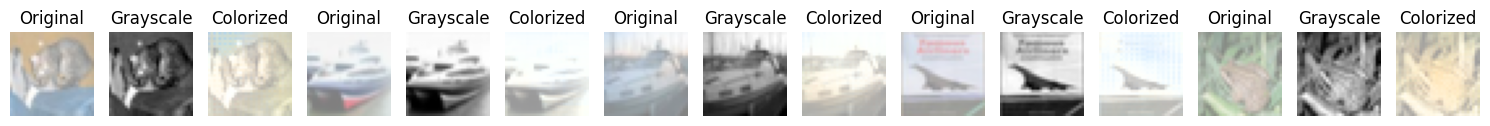

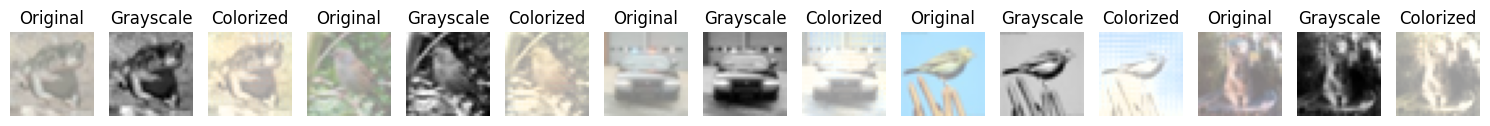

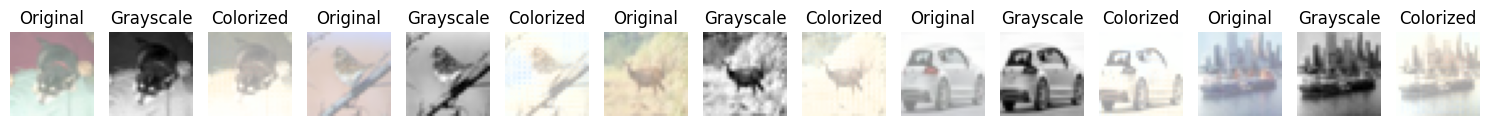

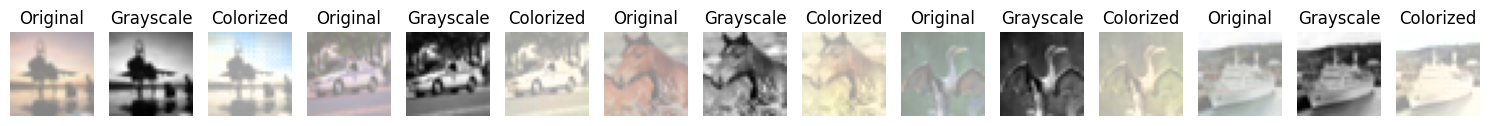

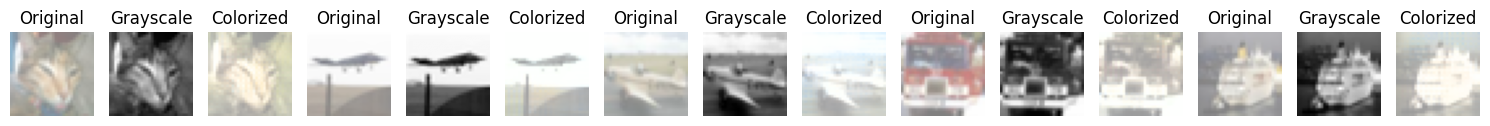

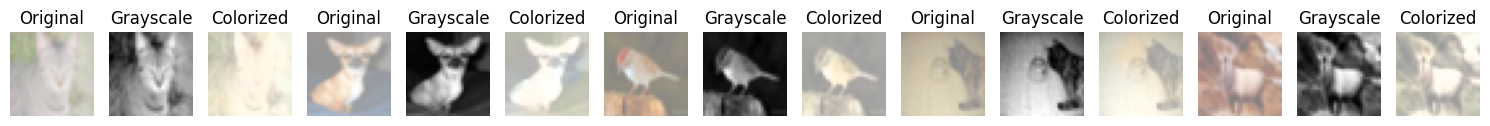

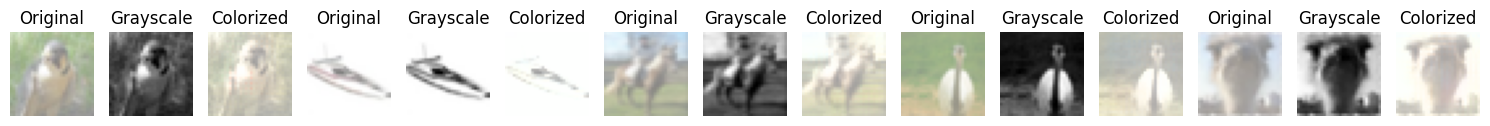

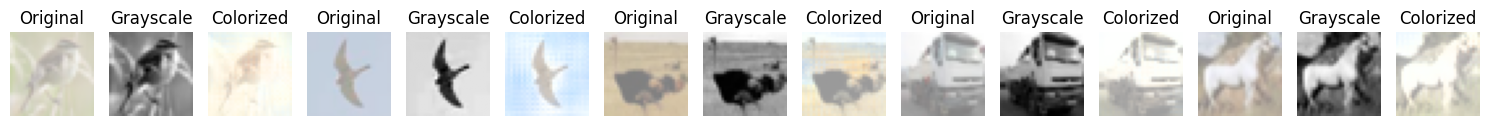

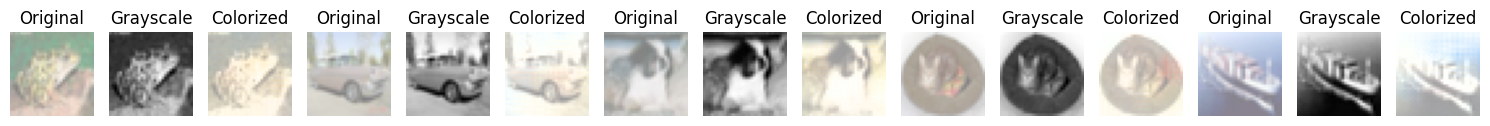

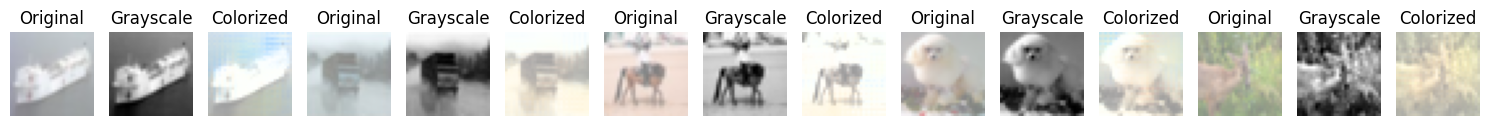

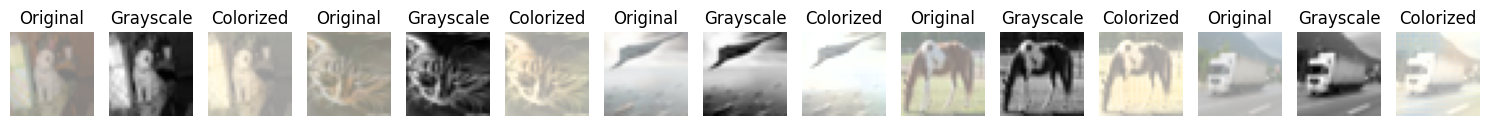

In [20]:
with torch.no_grad():
    for i, (images, _) in enumerate(test_loader):
        grayscale_images = rgb_to_gray(images).to(device)
        colorized_images = model(grayscale_images)


        grayscale_images_cpu = grayscale_images.cpu().squeeze(1)
        colorized_images_cpu = colorized_images.cpu()
        original_images_cpu = images.cpu()

        #colorized_images_cpu=scale_predicted_colors(colorized_images_cpu)
        colorized_images_cpu=exaggerate_colors(colorized_images_cpu)

        # Visualize the grayscale, colorized, and original images
        visualize_all_three(original_images_cpu, grayscale_images_cpu, colorized_images_cpu)

        if i == 10:  # only do this for up to certain batch for demonstration purposes
            break

In [21]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("Current working directory:", current_directory)


Current working directory: c:\Users\thedy\Downloads\colorization


In [22]:
# Save colorized images next to their original counterparts (with optional upscaling)
import os
import time
from PIL import Image


def tensor_to_pil(img_tensor, scale=None, target_size=None):
    """Convert a CxHxW torch tensor to a PIL Image and optionally upscale it.

    - img_tensor: torch tensor (C,H,W) in range [0,1] or [-1,1]
    - scale: integer scale factor (e.g. 4 => 32x -> 128x). If provided, target_size ignored.
    - target_size: (width, height) tuple to resize to (overrides scale if provided).
    """
    t = img_tensor.clone().detach().cpu()
    # Normalize to [0,1]
    if t.min() < 0.0 or t.max() > 1.0:
        t = (t + 1.0) / 2.0
    t = torch.clamp(t, 0.0, 1.0)
    arr = (t.numpy() * 255).astype('uint8')

    if arr.shape[0] == 1:
        arr2 = arr.squeeze(0)
        mode = 'L'
        pil = Image.fromarray(arr2, mode=mode)
        # convert grayscale to RGB when saving side-by-side consistently
        pil = pil.convert('RGB')
    else:
        arr2 = arr.transpose(1, 2, 0)  # HWC
        pil = Image.fromarray(arr2)

    # Upscale if requested
    if target_size is not None:
        new_size = (int(target_size[0]), int(target_size[1]))
        pil = pil.resize(new_size, resample=Image.BICUBIC)
    elif scale is not None and scale != 1:
        new_size = (pil.width * int(scale), pil.height * int(scale))
        pil = pil.resize(new_size, resample=Image.BICUBIC)

    return pil


def save_colorized_pairs(original_batch, colorized_batch, out_dir='imgs_out/pairs', start_idx=0, scale=None, target_size=None, side_by_side=False):
    """Save original and corresponding colorized images.

    - original_batch, colorized_batch: torch tensors (B, C, H, W) where original may be in [0,1].
    - scale: integer upscale factor (applied to both original and colorized).
    - target_size: (W, H) absolute target size (overrides scale).
    - side_by_side: if True, saves a single combined image with original on the left and colorized on the right.

    Returns updated start_idx (start_idx + number saved).
    """
    os.makedirs(out_dir, exist_ok=True)
    bs = min(len(original_batch), len(colorized_batch))
    for i in range(bs):
        orig = original_batch[i]
        col = colorized_batch[i]
        # ensure original in [0,1] if it was in [-1,1]
        orig_pil = tensor_to_pil(orig, scale=scale, target_size=target_size)
        col_pil = tensor_to_pil(col, scale=scale, target_size=target_size)

        fname_base = f"image_{start_idx + i:05d}"
        if side_by_side:
            w, h = orig_pil.size
            combo = Image.new('RGB', (w * 2, h))
            combo.paste(orig_pil, (0, 0))
            combo.paste(col_pil, (w, 0))
            combo.save(os.path.join(out_dir, fname_base + "_sidebyside.png"), quality=95)
        else:
            # include resolution in filename for clarity
            w, h = orig_pil.size
            orig_pil.save(os.path.join(out_dir, f"{fname_base}_orig_{w}x{h}.png"), quality=95)
            col_pil.save(os.path.join(out_dir, f"{fname_base}_colorized_{w}x{h}.png"), quality=95)
    return start_idx + bs


# Example usage: save up to N images from the test_loader at higher resolution
N = 5  # total images to save (small set)
saved = 0
# choose scale (e.g. 4, 8) or target_size (W,H). Set scale=None to use target_size instead.
SCALE = 4
TARGET_SIZE = None
SIDE_BY_SIDE = True
out_dir = os.path.join('imgs_out', 'pairs_' + time.strftime('%Y%m%d_%H%M%S'))
for i, (images, _) in enumerate(test_loader):
    # images are original color images (range [0,1]); move to device for model input
    grayscale_images = rgb_to_gray(images).to(device)
    with torch.no_grad():
        colorized_images = model(grayscale_images).cpu()

    saved = save_colorized_pairs(images, colorized_images, out_dir=out_dir, start_idx=saved, scale=SCALE, target_size=TARGET_SIZE, side_by_side=SIDE_BY_SIDE)
    if saved >= N:
        break

print(f"Saved {saved} original/colorized pairs to: {out_dir}")


Saved 64 original/colorized pairs to: imgs_out\pairs_20251128_135006
